In [1]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive
from scipy.optimize import fsolve
from prettytable import PrettyTable
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Professor Boxin Zhao - Universiy of Waterloo

Exercise problem 8        

For two identically charged spherical colloidal particles (R = $10^{-6}$m) with a surface potential of 50mV dispersed in a 0.01M sodium chloride solution. 

The effective Hamaker constant H121 = $6 x 10^{-20}$J 

(a) Write the DLVO expression of the potential energy of interactions between the particles

(b) Plot the total DLVO potential (VT) and its attraction (VA) and repulsion (VR) componentsversus separation distance (D)

(c) From the DLVO plot, determine the separation D0 where the interaction potential VT=0

In [2]:
T = input('Enter temperature in Kelvin: ') #[K]
T = float(T)
formatted_T = T

R = input('Enter particle radius in nanometers: ') #[m]
R = float(R)*10**-9
formatted_R = format(R, '.3E')
phi_o = input('Enter surface potential in millivolts: ') #[V]
phi_o = float(phi_o)/1000
formatted_phi_o = format(phi_o, '.3E')
H = input('Enter Hammaker contsant in Joules x 10^-20: ') #[J]
H = float(H)*10**-20
formatted_H = format(H, '.3E')
z = input('Enter valence number for salt ions: ') #valence number, symmetric electrolyte
z = int(z)

eta_r = 78.5 #[C^2/Jm]
eta_o = 8.854*10**-12 #[C^2/Jm]
formatted_eta_o = format(eta_o, '.3E')

k = 1.38*10**-23 #[J/K]
e = 1.602*10**-19 #[C]
pi = 3.14159


gamma_o = (exp((z * e * phi_o) / (2 * k * T)) - 1) / (exp((z * e * phi_o) / (2 * k * T)) + 1)

Enter temperature in Kelvin: 298
Enter particle radius in nanometers: 1000
Enter surface potential in millivolts: 50
Enter Hammaker contsant in Joules x 10^-20: 6
Enter valence number for salt ions: 1


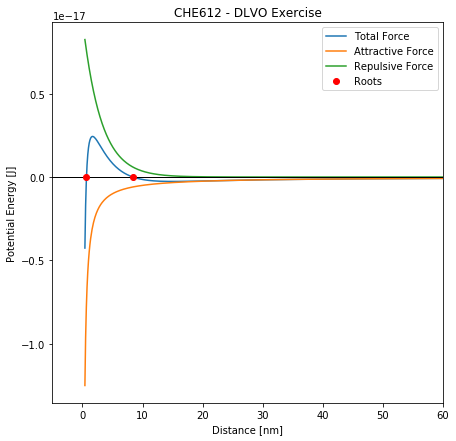

Roots: 0.661 8.386
+--------------+-----------+---------------+
|     Variable |   Value   | Units         |
+--------------+-----------+---------------+
|            T |   298.0   | K             |
|            R | 1.000E-06 | m             |
|        phi_o | 5.000E-02 | V             |
|            H | 6.000E-20 | J             |
|        eta_r |    78.5   | -             |
|        eta_o | 8.854E-12 | C^2/Jm        |
|            z |     1     | #             |
|         c*_o | 6.022E+24 | molecules/m^3 |
| decay length | 3.041E-09 | m             |
+--------------+-----------+---------------+


In [9]:
H=float(H)

def forces(D, salt_conc = .01):
    c_star_o = salt_conc * 6.022*10**23 * 1000 #[number/m^3]
    kappa = ((eta_r * eta_o * k * T)/(((1*e)**2 + (-1*e)**2)*c_star_o))**-.5
    attract = - (H * R) / (12 * D)
    repel = (64 * pi * R * k * T * c_star_o * gamma_o ** 2 * exp(-kappa * D)) / (kappa ** 2)
    total = repel + attract
    return attract, repel, total, c_star_o

def total_force(D, salt_conc):
    c_star_o = salt_conc * 6.022*10**23 * 1000 #[number/m^3]
    kappa = ((eta_r * eta_o * k * T)/(((1*e)**2 + (-1*e)**2)*c_star_o))**-.5
    attract = - (H * R) / (12 * D)
    repel = (64 * pi * R * k * T * c_star_o * gamma_o ** 2 * exp(-kappa * D)) / (kappa ** 2)
    total = repel + attract
    return total

def DVLO_graph(salt_conc = .01):

    D = np.linspace(.4*10**-9, 60*10**-9, 500) #[m]
    x_axis = np.zeros(len(D))
    V_T = []
    V_A = []
    V_R = []
    
    for item in D:
        attract, repel, total, c_star_o = forces(item, salt_conc)
        
        V_A.append(attract)
        V_R.append(repel)
        V_T.append(repel + attract)
        
    first_root = fsolve(total_force, .4*10**-9, salt_conc)
    second_root = fsolve(total_force, first_root + 2*10**-9, salt_conc)   
    
    figure = plt.figure(figsize = (7,7))
    plt.plot(D*10**9,V_T, label = "Total Force", figure=figure)
    plt.plot(D*10**9,V_A, label = "Attractive Force", figure=figure)
    plt.plot(D*10**9,V_R, label = "Repulsive Force", figure=figure)
    plt.plot([-5, 60], [0, 0], figure=figure, color = 'black', linewidth = 1)
    if .4 <= first_root*10**9 <= 60:
        plt.plot(first_root*10**9, 0, marker = 'o', color = 'red', lineStyle = 'None', label = "Roots")
    if .4 <= second_root*10**9 <= 60:
        plt.plot(second_root*10**9, 0, marker = 'o', color = 'red', lineStyle = 'None')
    plt.xlim([-5, 60])
    plt.legend()
    plt.title('CHE612 - DLVO Exercise')
    plt.xlabel('Distance [nm]')
    plt.ylabel('Potential Energy [J]')
    plt.show()
    
    formatted_c_star_o = format(c_star_o, '.3E')
    
    print('Roots:', round(float(first_root*10**9),3), round(float(second_root*10**9),3))
    
    table = PrettyTable()
    table.field_names = ['Variable', 'Value', 'Units']
    table.align['Variable'] = 'r'
    table.align['Units'] = 'l'
    table.add_row(['T', formatted_T, 'K'])
    table.add_row(['R', formatted_R, 'm'])
    table.add_row(['phi_o', formatted_phi_o, 'V'])
    table.add_row(['H', formatted_H, 'J'])
    table.add_row(['eta_r', eta_r, '-'])
    table.add_row(['eta_o', formatted_eta_o, 'C^2/Jm'])
    table.add_row(['z', z, '#'])
    table.add_row(['c*_o', formatted_c_star_o, 'molecules/m^3'])
    table.add_row(['decay length', format(((eta_r * eta_o * k * T)/(((1*e)**2 + (-1*e)**2)*c_star_o))**.5, '.3E'), 'm'])
    #decay length is 1/kappa
    print(table)    
    
DVLO_graph()



The two roots are the two interatomic distances (in nm) where the interaction potential is zero.

To explore the effect of salt concentration, check out the interactive plot below.

In [10]:
interactive_DVLO_graph = interactive(DVLO_graph, salt_conc=widgets.FloatSlider(min=.0001, max=.2, value=.01, step=.0001, readout_format = '.4f'))
interactive_DVLO_graph

interactive(children=(FloatSlider(value=0.01, description='salt_conc', max=0.2, min=0.0001, readout_format='.4…